In [59]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
import sys
from pathlib import Path
import seaborn as sns

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))

# Load dataframes

In [60]:
df_movies = pd.read_csv('data/processed/movies.csv')
# df_movies.head()
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81740 entries, 0 to 81739
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wikipedia movie ID  81740 non-null  int64  
 1   Freebase ID         81740 non-null  object 
 2   Movie name          81740 non-null  object 
 3   Release date        74838 non-null  object 
 4   Box office revenue  8400 non-null   float64
 5   Runtime             61290 non-null  float64
 6   Languages           81740 non-null  object 
 7   Countries           81740 non-null  object 
 8   Genres              81740 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


Notice we are missing information for 'Release Date', 'Box Office Revenue', and 'Runtime', 

In [61]:
df_characters = pd.read_csv('data/processed/characters.csv')
df_characters.head()
df_characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450668 entries, 0 to 450667
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia movie ID               450668 non-null  int64  
 1   Freebase movie ID                450668 non-null  object 
 2   Movie release date               440673 non-null  object 
 3   Character name                   192793 non-null  object 
 4   Actor DoB                        344523 non-null  object 
 5   Actor gender                     405059 non-null  object 
 6   Actor height (m)                 154823 non-null  float64
 7   Actor ethnicity (Freebase ID)    106058 non-null  object 
 8   Actor name                       449440 non-null  object 
 9   Actor age at movie release       292555 non-null  float64
 10  Freebase character/actor map ID  450668 non-null  object 
 11  Freebase character ID            192803 non-null  object 
 12  Fr

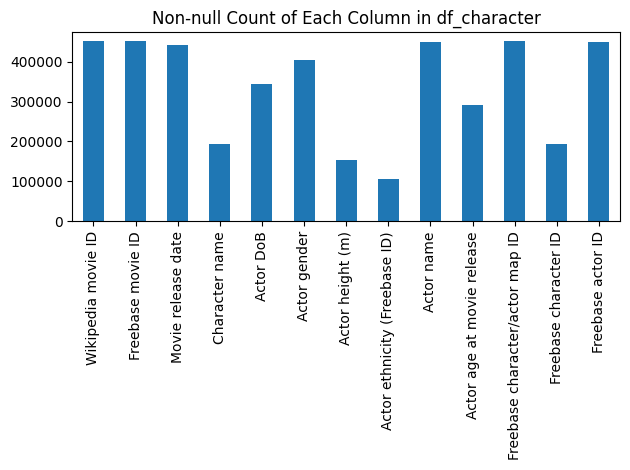

In [62]:
# plt.figure(figsize=(12, 6))
df_characters.count().plot(kind='bar')
plt.title('Non-null Count of Each Column in df_character')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [63]:
df_plots = pd.read_csv('data/processed/plot_summaries.csv')
df_plots.head()
df_plots.shape

(42302, 2)

In [64]:
# merge movie metadata and plots 
df_movies_summaries = pd.merge(df_movies, df_plots, on='Wikipedia movie ID')
df_movies_summaries.head()
df_movies_summaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42202 entries, 0 to 42201
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wikipedia movie ID  42202 non-null  int64  
 1   Freebase ID         42202 non-null  object 
 2   Movie name          42202 non-null  object 
 3   Release date        39584 non-null  object 
 4   Box office revenue  7586 non-null   float64
 5   Runtime             35578 non-null  float64
 6   Languages           42202 non-null  object 
 7   Countries           42202 non-null  object 
 8   Genres              42202 non-null  object 
 9   Summary             42202 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.2+ MB


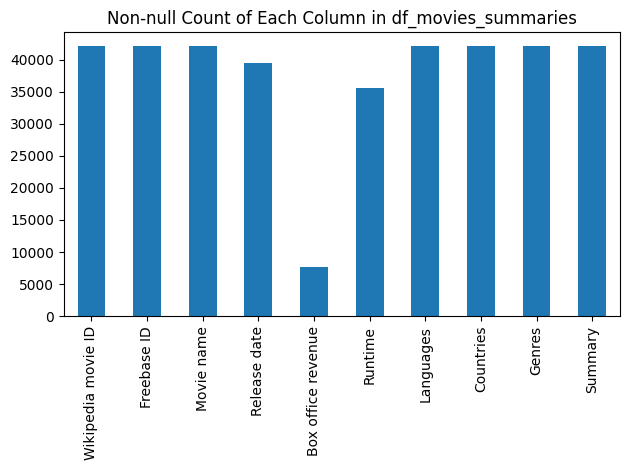

In [65]:
df_movies_summaries.count().plot(kind='bar')
plt.title('Non-null Count of Each Column in df_movies_summaries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Preprocessing - Data Distributions 

In [66]:
from src.data.process_data import *

## Movies 
### Languages

In [67]:
df_movies["Lang names"] = df_movies["Languages"].apply(extract_tuples_values)
df_movies["Lang names"].head()

0                 [English Language]
1               [Norwegian Language]
2                 [English Language]
3                  [German Language]
4    [Silent film, English Language]
Name: Lang names, dtype: object

In [68]:

import re
def clean_languages(s):
    s = re.sub(r'(?i)languages?','',str(s))
    return s
df_movies["Lang names"] = df_movies["Lang names"].apply(clean_languages)


In [78]:
print('There are {} different languages'.format(len(df_movies["Lang names"].unique())))



There are 1817 different languages


### Release dates

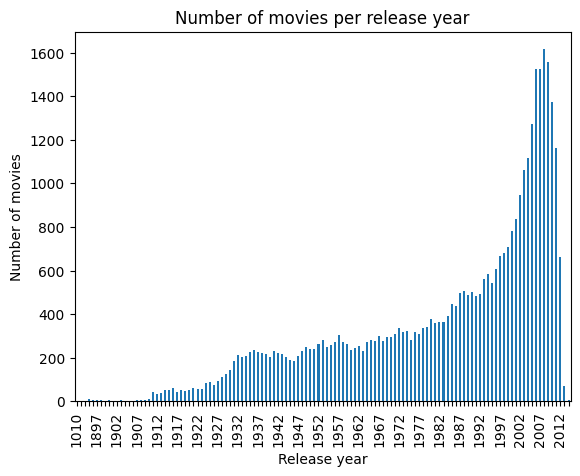


Number of movies per year:
Release date
1010       1
1893       1
1894       2
1895       9
1896       6
        ... 
2010    1374
2011    1162
2012     662
2013      70
2014       4
Length: 123, dtype: int64


In [160]:
def extract_year(date_string):
    # Find all 4-digit numbers in the string
    years = re.findall(r'\b\d{4}\b', str(date_string))
    # Return the first match if found, otherwise return None
    return years[0] if years else None

df_movies_summaries['Release date'] = df_movies_summaries['Release date'].apply(extract_year)
df_movies_summaries.groupby('Release date').size().plot(kind='bar')
# Get current axis
ax = plt.gca()

# Show only every 10th tick
n = 5  # Show ticks every n years
ticks = ax.xaxis.get_ticklabels()
for i, tick in enumerate(ticks):
    if i % n != 0:
        tick.set_visible(False)

plt.title('Number of movies per release year')
plt.xlabel('Release year')
plt.ylabel('Number of movies')


plt.show()
print("\nNumber of movies per year:")
print(df_movies_summaries.groupby('Release date').size())

In [170]:
 df_movies_summaries[df_movies_summaries['Release date'] == '1946']

,Wikipedia movie ID,Freebase ID,Movie name,Release date,Box office revenue,Runtime,Languages,Countries,Genres,Summary
460,7544443,/m/0kvb4f,Tomorrow is Forever,1946,NaN,105.0,"{""/m/04306rv"": ""German Language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America""}","{""/m/01lrrt"": ""Melodrama"", ""/m/07s9rl0"": ""Dram...",The movie tells the story of Elizabeth and Jo...
485,6352213,/m/0g26jx,Hare Remover,1946,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/0hqxf"": ""Famil...","Elmer tries his best to make a ""Jekyll and Hyd..."
673,2332364,/m/074dk4,The Strange Love of Martha Ivers,1946,NaN,116.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01lrrt"": ""Me...",On a rainy night in 1928 in a Pennsylvania fac...
768,10387789,/m/02qb69b,The Secret Heart,1946,NaN,97.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/01g6gs"": ""Black-an...","Lee is engaged to marry Larry Adams, a spendth..."
989,7725707,/m/0kvg39,Deception,1946,NaN,112.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...",Christine Radcliffe runs up the stairs of a c...
...,...,...,...,...,...,...,...,...,...,...
41734,3585135,/m/09n3z1,Undercurrent,1946,NaN,116.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",Ann Hamilton is a middle-aged bride who begin...
41942,1226363,/m/04k1hd,Beauty and the Beast,1946,NaN,93.0,"{""/m/064_8sq"": ""French Language""}","{""/m/0f8l9c"": ""France""}","{""/m/02n4lw"": ""Art film"", ""/m/03q4nz"": ""World ...","While scrubbing the floor at home, Belle is i..."
42024,8004497,/m/026n72t,Rhythm and Weep,1946,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/01z4y"": ""Comed...",The Stooges play the roles of unsuccessful ac...
42156,2238130,/m/06y9rw,Crack-Up,1946,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/09blyk"": ""Psycho...",Art critic and forgery expert George Steele i...


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charlottemeyer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'yours', 'be', "wasn't", "you'll", 'she', 'any', 'my', 'theirs', 'again', 'all', 'under', "you're", 'aren', 'itself', "couldn't", 'if', 'am', 'more', 'yourself', 'm', 'out', 'nor', "weren't", 'it', 'on', 'why', 'your', 'just', 'were', 'can', 're', 'is', 'doing', 'during', 'was', 'doesn', 'up', 'this', 'an', 'ourselves', 'such', "shan't", 'because', 'did', "isn't", 'who', 'until', 'both', 'own', 'he', 'himself', 'hers', 'where', 'not', 'ma', 'shan', 'themselves', 'when', 'each', 'to', 'and', "mustn't", 'through', 'between', 'above', 'wouldn', "won't", "that'll", 'now', 'won', 't', 'once', 'about', 'of', 'these', 'but', 'mightn', 'ain', 's', 'down', 'that', 'wasn', 'y', 'needn', 'isn', 'then', 'are', 'very', "aren't", 'those', 'which', 'how', "you'd", 'didn', 'myself', 'below', 'most', 'other', 'herself', "mightn't", 'same', 'their', 'against', "wouldn't", 'for', 'll', 'whom', 'only', 'so', 'haven', "shouldn't", 'i', 'they', 'will', 'there', 'few', "she's", "you've", 'them', 'its', 'do'

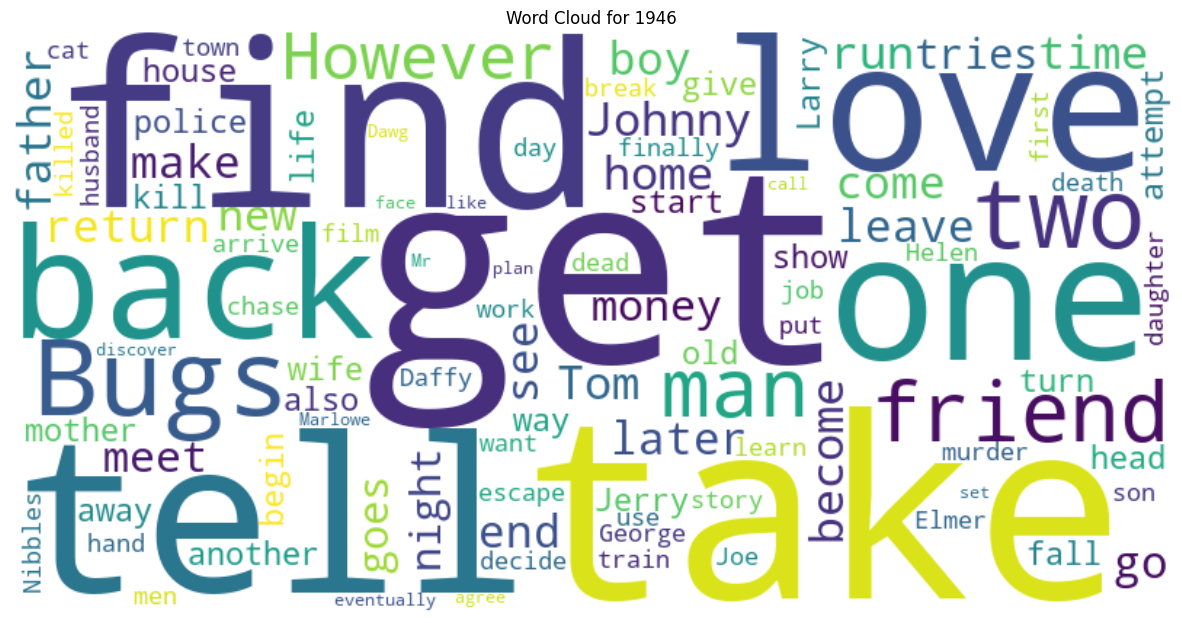

In [171]:
from wordcloud import WordCloud
import nltk  # Note the spelling: nltk, not ntlk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')  
stop_words = set(stopwords.words("english"))  


print(stop_words)
def create_wordcloud(text):
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',
        stopwords=stop_words,
        max_words=100
    ).generate(text)
    
    return wordcloud

def plot_wordcloud_for_year(year):
    year_texts = df_movies_summaries[df_movies_summaries['Release date'] == year]['Summary'].str.cat(sep=' ')
    
    if not year_texts:
        print(f"No movies found for year {year}")
        return
    
    # Create wordcloud
    wordcloud = create_wordcloud(year_texts)
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {year}')
    plt.show()

plot_wordcloud_for_year('1946')  # Change year here


ACTORS

In [177]:
df_movies_characters = df_movies.merge(df_characters, on='Wikipedia movie ID')
df_movies_characters.head()



,Wikipedia movie ID,Freebase ID,Movie name,Release date,Box office revenue,Runtime,Languages,Countries,Genres,Lang names,...,Character name,Actor DoB,Actor gender,Actor height (m),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",['English '],...,Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",['English '],...,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm
2,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",['English '],...,NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh
3,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",['English '],...,NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb
4,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",['English '],...,FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5


In [189]:
df_movies_characters["Actor ethnicity (Freebase ID)"] = df_movies_characters["Actor ethnicity (Freebase ID)"].apply(extract_tuples_values)


TypeError: the JSON object must be str, bytes or bytearray, not float

In [187]:
ethnicity_by_year = df_movies_characters.groupby(['Release date','Actor ethnicity (Freebase ID)']).size()
ethnicity_by_year.head()

Release date  Actor ethnicity (Freebase ID)
1891          /m/03lmx1                        1
1894          /m/03lmx1                        1
1896          /m/063k3h                        1
1900          /m/041rx                         1
1901          /m/063k3h                        1
dtype: int64

/var/folders/3q/hzh268rx169fgmsptrb9rzzm0000gn/T/ipykernel_10654/4265157625.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')


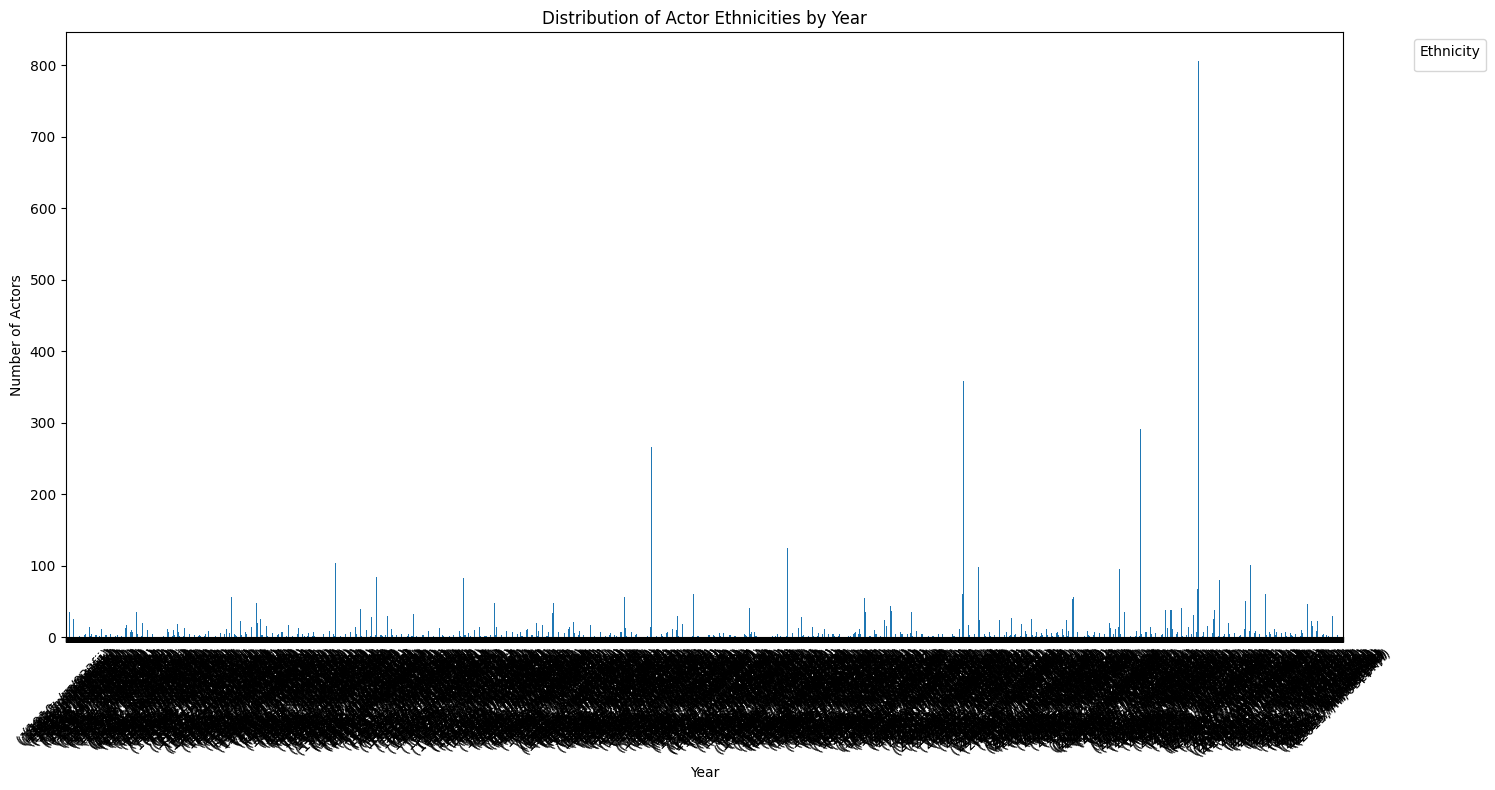

ValueError: No axis named 1 for object type Series

In [185]:
# Create a stacked bar plot
plt.figure(figsize=(15, 8))
ethnicity_by_year.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Distribution of Actor Ethnicities by Year')
plt.xlabel('Year')
plt.ylabel('Number of Actors')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show only every 10th year on x-axis for better readability
ax = plt.gca()
n = 10  # Show ticks every n years
ticks = ax.xaxis.get_ticklabels()
for i, tick in enumerate(ticks):
    if i % n != 0:
        tick.set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Calculate percentages instead of absolute numbers
ethnicity_percentages = ethnicity_by_year.div(ethnicity_by_year.sum(axis=1), axis=0) * 100

# Create a 100% stacked bar plot
plt.figure(figsize=(15, 8))
ethnicity_percentages.plot(kind='bar', stacked=True)

plt.title('Percentage Distribution of Actor Ethnicities by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Actors')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show only every 10th year
ax = plt.gca()
for i, tick in enumerate(ticks):
    if i % n != 0:
        tick.set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print some summary statistics
print("\nSummary of ethnicity distribution:")
print("\nTotal counts by ethnicity:")
print(ethnicity_by_year.sum())
print("\nAverage percentage by ethnicity:")
print(ethnicity_percentages.mean().round(2))

### Genres
### Release dates
### Runtimes 
### Box office revenues
### Countries 
## Actors 
### Gender
### Ages (DoB and age during movie) 
### Ethnicity 
### Height?

# Preprocessing - Cleaning 